<a href="https://colab.research.google.com/github/chineidu/NLP-Tutorial/blob/main/notebook/03_tensorflow/02_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression With TensorFlow

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf


### Create Data

* This data will be used to train the neural network

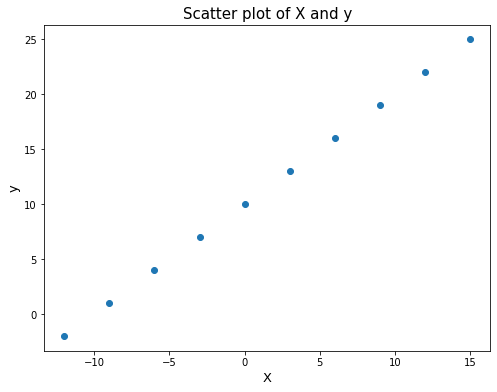

In [2]:
X = np.array([[-12, -9, -6, -3, 0, 3, 6, 9, 12, 15]]) # Row Matrix
y = np.array([-2, 1, 4, 7, 10, 13, 16, 19, 22, 25])


# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter plot of X and y", size=15)
plt.show()

In [3]:
y == X + 10

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [4]:
# Convert the NumPy arrays to Tensors
# Cast and reshape X
X = tf.cast(tf.constant(X), dtype=tf.float16)
X = tf.reshape(X, shape=(-1, 1))
y = tf.cast(tf.constant(y), dtype=tf.float16)

X.shape, y.shape

(TensorShape([10, 1]), TensorShape([10]))

### Steps In Modelling With TensorFlow

1. **Create a model**: define the `input`, `hidden` and `output` layers of the deep learning model.
2. **Compile the model**: define the `loss function` (i.e the function that tells our model how wrong it is), the `optimizer` (it tells our model how to improve the patterns its learning) and the `evaluation metrics` (what we can use to interpret the performance of our model).
3. **Fit the model**: the model `learns` the `patterns` between the input and the output

#### Create a baseline model


### Some Key Terms

* **Loss**: How wrong the model predictions are (you want to minimize this)
* **Optimizer**: It tells the model how it should update it's parameters to imporeve its predictions.
* **Metrics**: Human interpretable values for how well the model is performing.
* **Epocs**: This represents the number of times the model will go thru all the training examples.
* **Evaluation** (on unseen data): This tells us how reliable the our model predictions are on unseen data.

In [5]:
# Set seed for reproducibility
SEED = 123
tf.random.set_seed(SEED)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None) # The model has a single neuron

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # MAE: Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # OR 'sgd'
              metrics = ["mae"] # OR tf.keras.losses.mae
              )

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 12.2893 - mae: 12.2893
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 12.1308 - mae: 12.1308
Epoch 3/5
1/1 [==============================] - 0s 26ms/step - loss: 11.9723 - mae: 11.9723
Epoch 4/5
1/1 [==============================] - 0s 40ms/step - loss: 11.8138 - mae: 11.8138
Epoch 5/5
1/1 [==============================] - 0s 31ms/step - loss: 11.6553 - mae: 11.6553


In [6]:
X, y

(<tf.Tensor: shape=(10, 1), dtype=float16, numpy=
 array([[-12.],
        [ -9.],
        [ -6.],
        [ -3.],
        [  0.],
        [  3.],
        [  6.],
        [  9.],
        [ 12.],
        [ 15.]], dtype=float16)>,
 <tf.Tensor: shape=(10,), dtype=float16, numpy=array([-2.,  1.,  4.,  7., 10., 13., 16., 19., 22., 25.], dtype=float16)>)

In [7]:
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 0s 222ms/step


array([[1.7534369]], dtype=float32)

In [8]:
# Since the mae is ~11 on average, let's add 11 to the predicted value
y_pred + 11

array([[12.753437]], dtype=float32)

### Improve The Model

> We can improve the model by altering the steps taken to create the model.

1. **Create model**: We might:
  * Add more layers
  * increase the number of hidden units(neurons)
  * change the activation function

2. **Compile model**: We might:
  * change the optimization function
  * change the learning rate

3. **Fit the model**: We might:
  * increase the number of epochs
  * increase the training data

In [9]:
# Rebuild the model by increasing the number of epochs
tf.random.set_seed(SEED)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (increase the epochs)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 9.2221 - mae: 9.2221
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 9.1896 - mae: 9.1896
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 9.1571 - mae: 9.1571
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 9.1246 - mae: 9.1246
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0921 - mae: 9.0921
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0596 - mae: 9.0596
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0271 - mae: 9.0271
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 8.9946 - mae: 8.9946
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 8.9621 - mae: 8.9621
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 8.9296 - mae: 8.9296
Epoch 11/100
1/1 [==============================] - 0s 21ms/step - loss

In [10]:
# Make predictions
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 0s 241ms/step


array([[29.860645]], dtype=float32)

#### Tweak The Model

* Experiment by changing the `hyperparameters`.
* Add a new layer.

In [11]:
# Build model
tf.random.set_seed(SEED)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation="ReLU"),
    tf.keras.layers.Dense(units=1, activation=None)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.01),
              metrics=["mae"])

# Fit model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 10.9238 - mae: 10.9238
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 10.3945 - mae: 10.3945
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 9.8394 - mae: 9.8394
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 9.2725 - mae: 9.2725
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 8.7630 - mae: 8.7630
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 8.3173 - mae: 8.3173
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 7.8436 - mae: 7.8436
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 7.3385 - mae: 7.3385
Epoch 9/100
1/1 [==============================] - 0s 31ms/step - loss: 6.8038 - mae: 6.8038
Epoch 10/100
1/1 [==============================] - 0s 32ms/step - loss: 6.2436 - mae: 6.2436
Epoch 11/100
1/1 [==============================] - 0s 30ms/step - 

In [12]:
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 157ms/step


array([[33.54698]], dtype=float32)

### Try Using A Different Optimizer

* e.g. Adam

In [13]:
# Build model
tf.random.set_seed(SEED)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50, activation=None),
    tf.keras.layers.Dense(units=1),
])
# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.8510 - mae: 12.8510
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 11.9918 - mae: 11.9918
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 11.3185 - mae: 11.3185
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 10.8250 - mae: 10.8250
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 10.5215 - mae: 10.5215
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 10.2264 - mae: 10.2264
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 9.9341 - mae: 9.9341
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 9.6408 - mae: 9.6408
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 9.3434 - mae: 9.3434
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 9.0395 - mae: 9.0395
Epoch 11/100
1/1 [==============================] - 0s 39ms

In [14]:
# Make predictions
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 301ms/step


array([[27.806131]], dtype=float32)

### Evaluate The Model Performance

* It's a good idea to `visualize`.
* We can visualize the following:

  1. Data.
  2. Model.
  3. Model training.
  4. The model predictions.

In [15]:
# Create a bigger data
X = tf.cast(tf.range(-100, 100, 4), dtype=tf.float16)
y = X + 10


# Turn it into a matrix
X = tf.expand_dims(X, axis=-1)


tf.size(X).numpy()

50

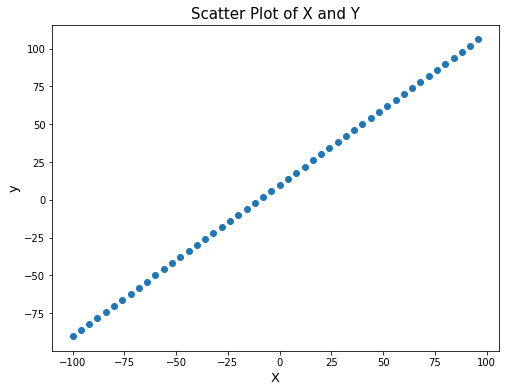

In [16]:
# Visualize the data
plt.figure(figsize=(8, 6))

plt.scatter(X, y)
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter Plot of X and Y", size=15)

plt.show()

In [17]:
0.8 * X.shape[0]

40.0

In [18]:
# Split the data
X_train, X_val = X[:40], X[40:]
y_train, y_val = y[:40], y[40:]

X_train.shape, X_val.shape

(TensorShape([40, 1]), TensorShape([10, 1]))

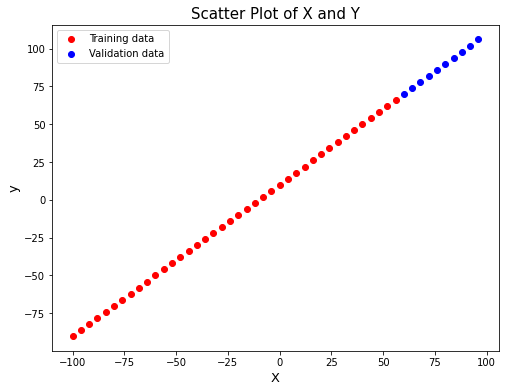

In [19]:
# Visualize the data
plt.figure(figsize=(8, 6))

plt.scatter(X_train, y_train, color="red", label="Training data")
plt.scatter(X_val, y_val, color="blue", label="Validation data")
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter Plot of X and Y", size=15)
plt.legend()

plt.show()

### Visualize The Data Split

In [20]:
# from sklearn.model_selection import train_test_split



# RANDOM_STATE, TEST_SIZE = 123, 0.2

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
# X_train.shape, X_val.shape

In [21]:
# Build model (with input shape)
tf.random.set_seed(SEED)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation=None, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(units=1, name="output_layer"),
], name="neural_net_1")

# Compile 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["mae"])



In [22]:
# model.build()
model.summary()

Model: "neural_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Some Key Terms
* **Total params**: total number of parameters the model needs to learn.
* **Trainable params**: these are the parameters (patterns) that the model can update as it trains.
* **Non-trainable params**: these parameters are not updated during training. this is typical when you use an already learned parameters from other models during training (i.e transfer learning)

In [23]:
# Fit 
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 58.7911 - mae: 58.7911
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 22.7598 - mae: 22.7598
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 31.5355 - mae: 31.5355
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 20.4240 - mae: 20.4240
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 21.0946 - mae: 21.0946
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 14.5645 - mae: 14.5645
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 21.0105 - mae: 21.0105
Epoch 8/100
2/2 [==============================] - 0s 17ms/step - loss: 18.1868 - mae: 18.1868
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 11.2285 - mae: 11.2285
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 16.2670 - mae: 16.2670
Epoch 11/100
2/2 [==============================]

### Visualize The Model

[![image.png](https://i.postimg.cc/XJnBMPTk/image.png)](https://postimg.cc/Lq08Lx4J)

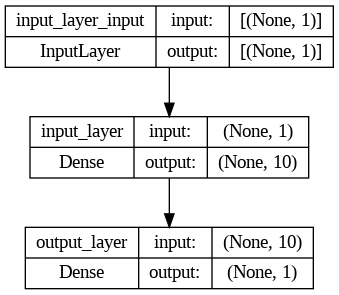

In [24]:
from tensorflow.keras.utils import plot_model


plot_model(model, show_shapes=True)

In [25]:
def plot_prediction(X_train=X_train, 
                    X_val=X_val, 
                    y_train=y_train, 
                    y_val=y_val, 
                    y_predictions=y_pred) -> "Plot":
  """This is used to visualize the model predictions.

  Params:
    X_train (tf.tensor): The training data.
    X_val (tf.tensor): The validation data.
    y_train (tf.tensor): The labels of the training data.
    y_train (tf.tensor): The labels of the validation data.
    y_pred (tf.tensor): The predicted data.

  Returns:
    None
  """
  # Visualize the data
  plt.figure(figsize=(8, 6))

  plt.scatter(X_train, y_train, color="red", label="Training data")
  plt.scatter(X_val, y_val, color="blue", label="Validation data")
  plt.scatter(X_val, y_predictions, color="green", label="Predicted data")
  plt.xlabel("X", size=13)
  plt.ylabel("y", size=13)
  plt.title("Scatter Plot of X and Y", size=15)
  plt.legend()

  plt.show()

In [26]:
# Make predictions
y_pred = model.predict(X_val)

1/1 [==============================] - 0s 73ms/step


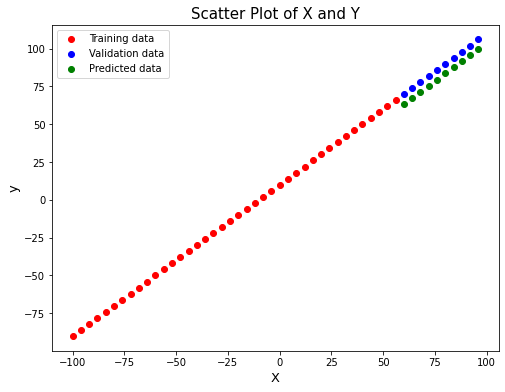

In [27]:
plot_prediction(y_predictions=y_pred)

In [28]:
# Evaluate
model.evaluate(X_val, y_val)

1/1 [==============================] - 0s 246ms/step - loss: 6.5232 - mae: 6.5232


[6.523158073425293, 6.523158073425293]

### Challenge

> Implement the following:

1. Mean Absolute Error

```python
tf.keras.losses.MAE()

# OR
tf.metrics.mean_absolute_error()
```

$$
mae = \frac{\sum^n_{i=1}{|y_{i}} - \hat{y}_{i}|}{n}
$$

2. Mean Squared Error

```python
tf.keras.losses.MSE()

# OR
tf.metrics.mean_square_error()
```

$$
mse = \frac{\sum^n_{i=1}{(y_{i}} - \hat{y}_{i})^2}{n}
$$